# [Introduction to `seaborn`](https://www.datacamp.com/completed/statement-of-accomplishment/course/7bdb7c8fbbb19c83b4f8920b694b66243f6b002a)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/data_science/introduction_to_seaborn/notebook.ipynb)

**Contents**
* [Introduction](#Introduction)
* [Relational Plots](#Relational-Plots)
* [Categorical Plots](#Catetgorical-Plots)
* [Customizing Plots](#Customizing-Plots)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

BASE_URL = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/data_science/introduction_to_seaborn/"

student_data = pd.read_csv(BASE_URL + "student_data.csv")
survey_data = pd.read_csv(BASE_URL + "survey_data.csv")
mpg = pd.read_csv(BASE_URL + "mpg.csv")
mpg_mean = pd.read_csv(BASE_URL + "mpg_mean.csv")

## Introduction

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

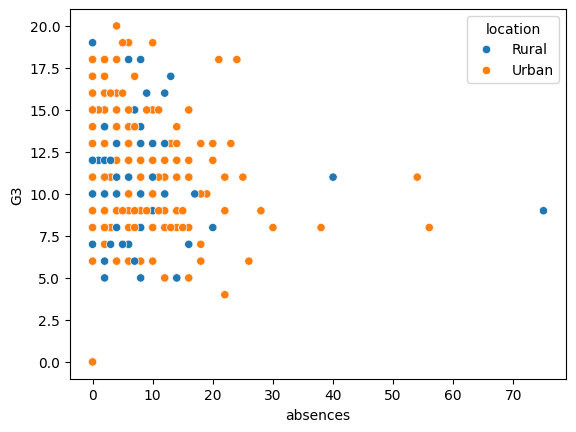

In [2]:
# plot absences vs final grade
# color by location with custom hue order
sns.scatterplot(
    student_data,
    x="absences",
    y="G3",
    hue="location",
    hue_order=["Rural", "Urban"],
)
plt.show()

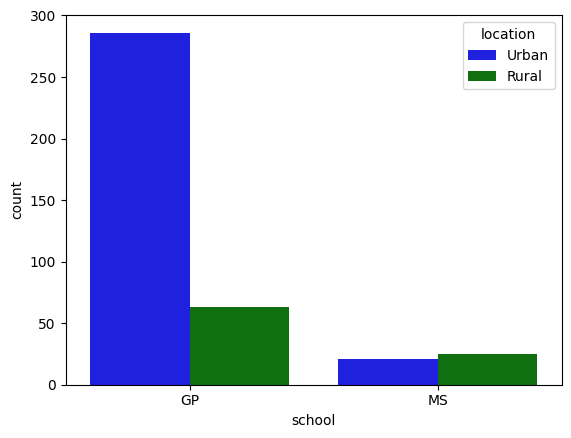

In [3]:
# count plot school
# color by location with custom palette
sns.countplot(
    student_data,
    x="school",
    hue="location",
    palette={"Rural": "green", "Urban": "blue"},
)
plt.show()

## Relational Plots

_Relational plots_ are either scatter or line plots. The `relplot()` method allows you to create multiple subplots in a single figure, which allows for easy interpretation of the relationships between variables.

### Scatter

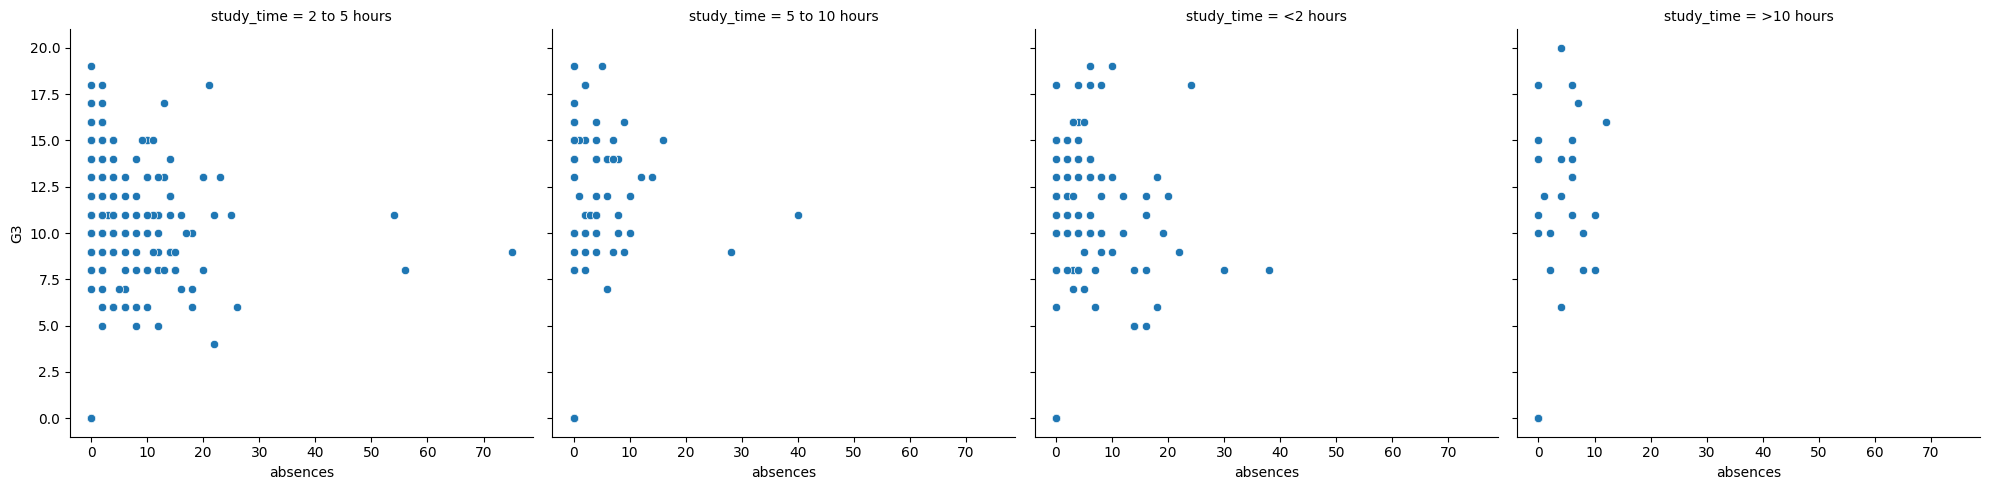

In [4]:
# scatter plot absences vs final grade
# subplot by study time
sns.relplot(
    student_data,
    x="absences",
    y="G3",
    kind="scatter",
    col="study_time",
)
plt.show()

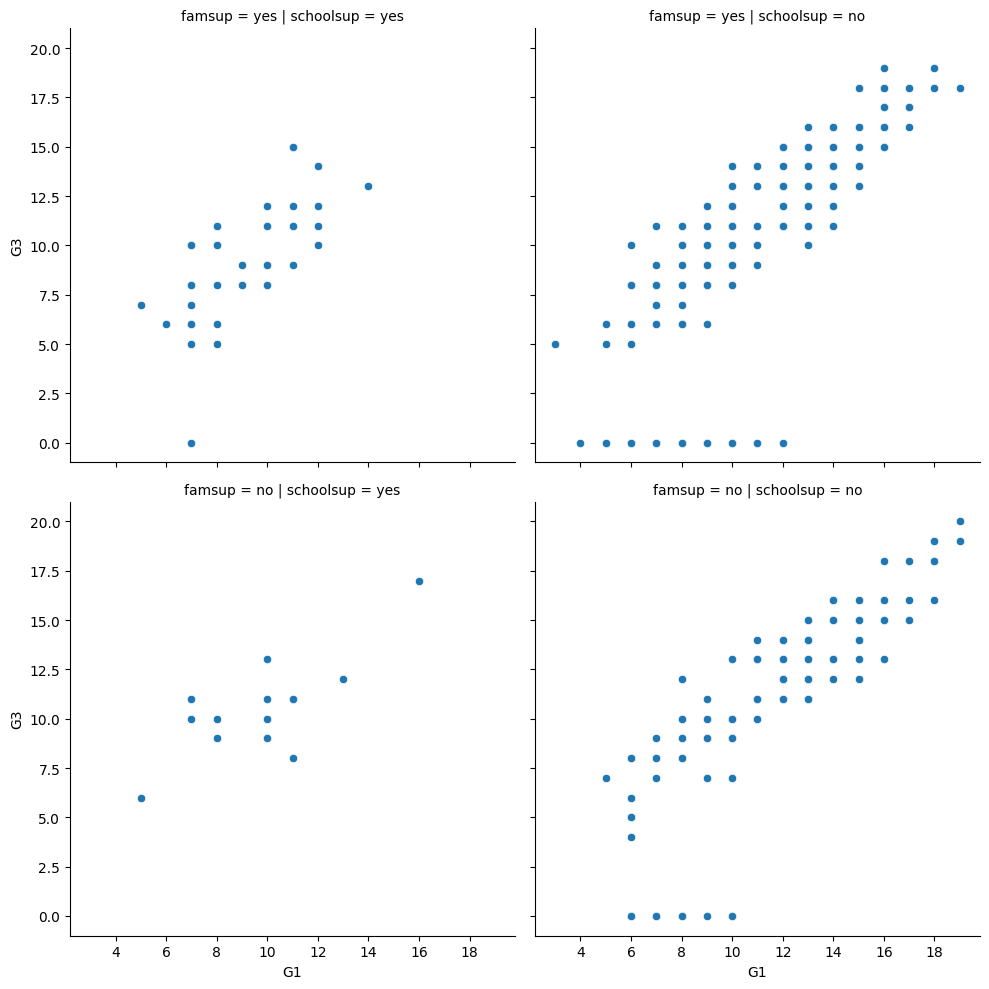

In [5]:
# scatter plot G1 vs final grade
# subplot by school support and family support
# change default ordering
sns.relplot(
    student_data,
    x="G1",
    y="G3",
    kind="scatter",
    col="schoolsup",
    col_order=["yes", "no"],
    row="famsup",
    row_order=["yes", "no"],
)
plt.show()

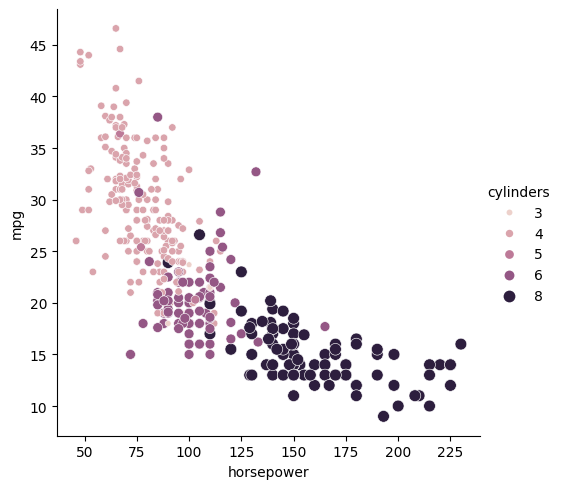

In [6]:
# scatter plot horsepower vs mpg
# size and color by cylinders
sns.relplot(
    mpg,
    x="horsepower",
    y="mpg",
    kind="scatter",
    size="cylinders",
    hue="cylinders",
)
plt.show()

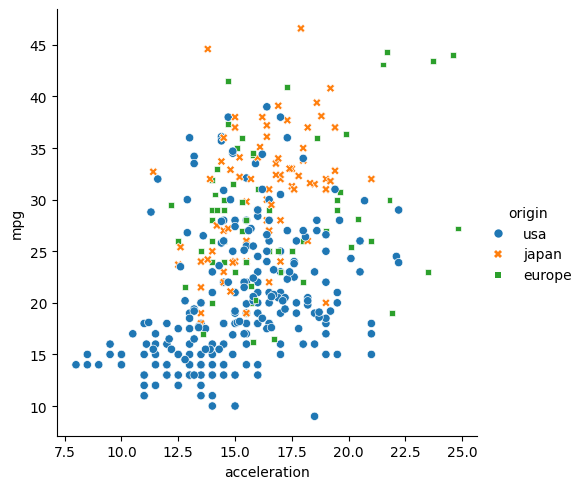

In [7]:
# scatter plot acceleration vs mpg
# color and style by origin
sns.relplot(
    mpg,
    x="acceleration",
    y="mpg",
    kind="scatter",
    hue="origin",
    style="origin",
)
plt.show()

### Line

Relational line plots display a _confidence interval_ (enabled by default) represented as a shaded region around the line. Note that the `ci` keyword-argument is deprecated in favor of `errorbar`.

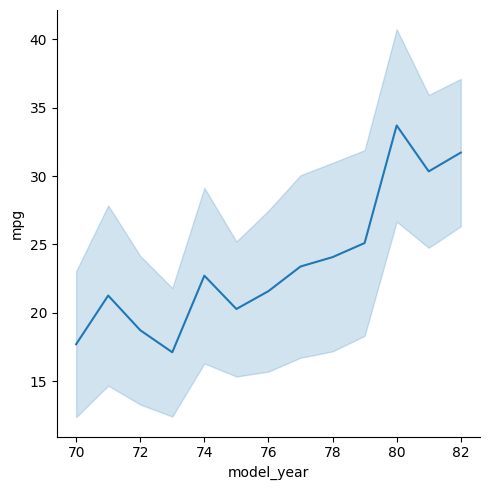

In [8]:
# line plot model year vs mpg
# change confidence interval to standard deviation
sns.relplot(
    mpg,
    x="model_year",
    y="mpg",
    kind="line",
    errorbar="sd",
)
plt.show()

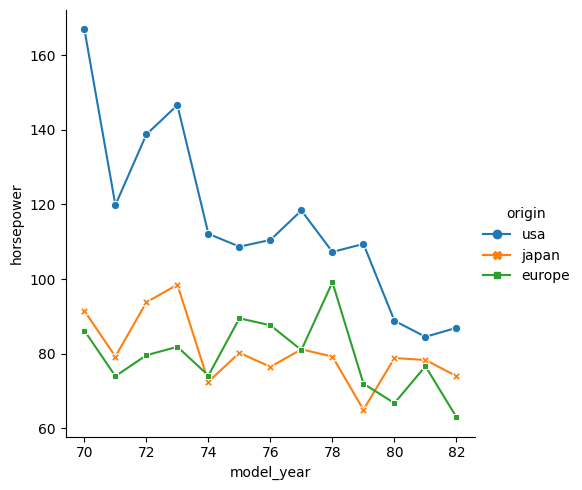

In [9]:
# line plot model year vs horsepower
# color and style by origin
# remove confidence intervals
# use markers instead of dashes
sns.relplot(
    mpg,
    x="model_year",
    y="horsepower",
    kind="line",
    hue="origin",
    style="origin",
    errorbar=None,
    dashes=False,
    markers=True,
)
plt.show()

## Categorical Plots

### Count

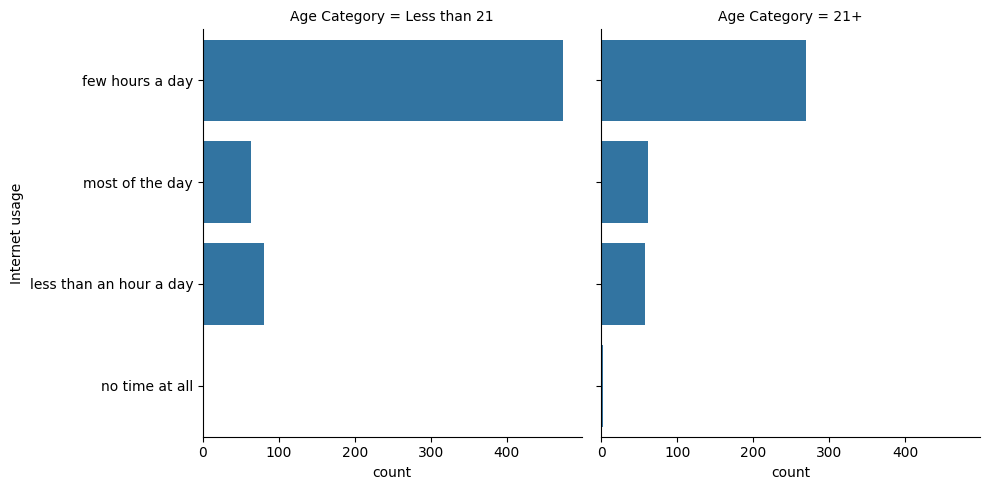

In [10]:
# count plot internet usage
# subplot by age category
sns.catplot(
    survey_data,
    y="Internet usage",
    kind="count",
    col="Age Category",
)
plt.show()

### Bar

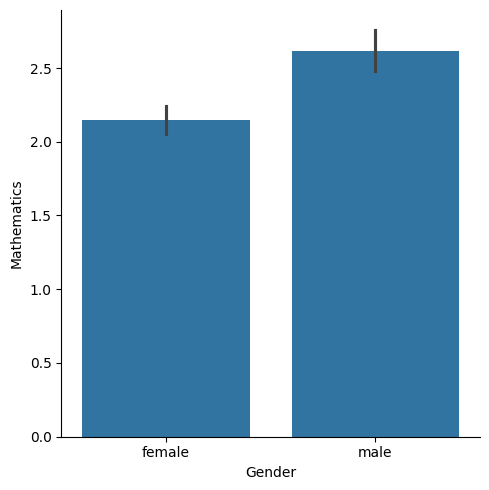

In [11]:
# bar plot math interest by gender
sns.catplot(
    survey_data,
    x="Gender",
    y="Mathematics",
    kind="bar",
)
plt.show()

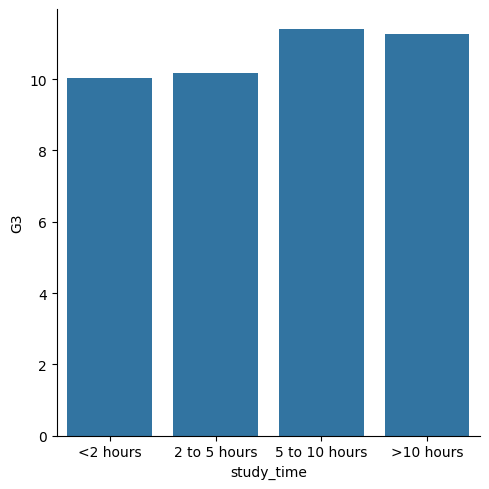

In [12]:
# list of categories from lowest to highest
category_order = [
    "<2 hours",
    "2 to 5 hours",
    "5 to 10 hours",
    ">10 hours",
]

# bar plot average final grade in each study category
# remove confidence intervals
sns.catplot(
    student_data,
    x="study_time",
    y="G3",
    kind="bar",
    order=category_order,
    errorbar=None,
)
plt.show()

### Box

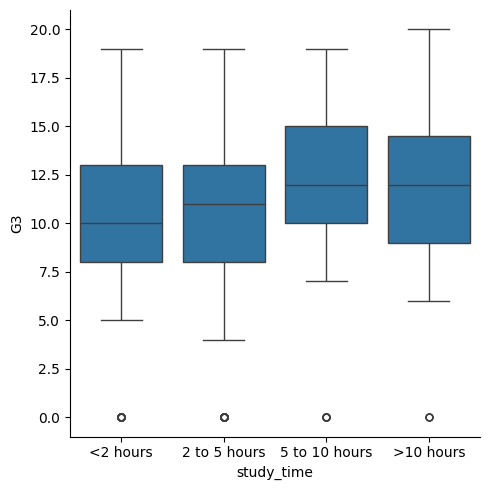

In [13]:
study_time_order = [
    "<2 hours",
    "2 to 5 hours",
    "5 to 10 hours",
    ">10 hours",
]

# box plot study time with final grade
sns.catplot(
    student_data,
    x="study_time",
    y="G3",
    kind="box",
    order=study_time_order,
)
plt.show()

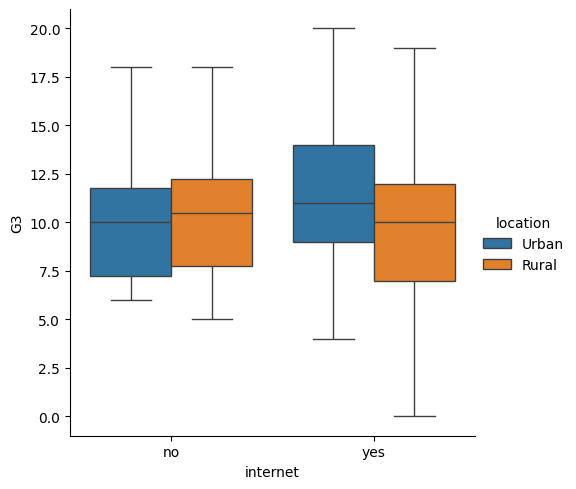

In [14]:
# box plot internet with final grade
# color by location
# remove outliers
sns.catplot(
    student_data,
    x="internet",
    y="G3",
    kind="box",
    hue="location",
    showfliers=False,
)
plt.show()

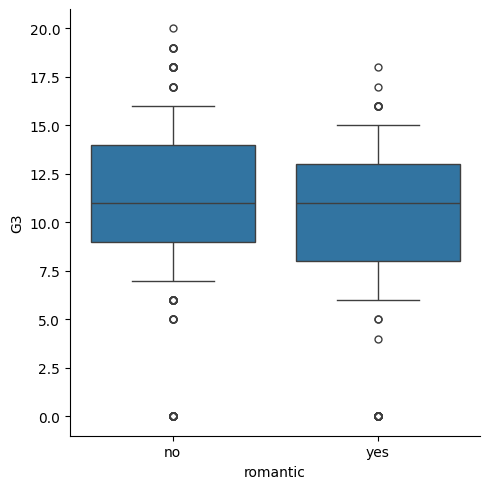

In [15]:
# box plot romantic with final grade
# set whiskers to `0.5 * IQR`
sns.catplot(
    student_data,
    x="romantic",
    y="G3",
    kind="box",
    whis=0.5,
)
plt.show()

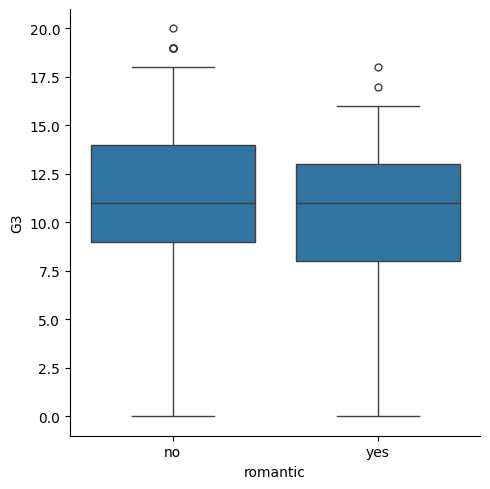

In [16]:
# box plot romantic with final grade
# set whiskers to "5th to 95th percentile"
sns.catplot(
    student_data,
    x="romantic",
    y="G3",
    kind="box",
    whis=[5, 95],
)
plt.show()

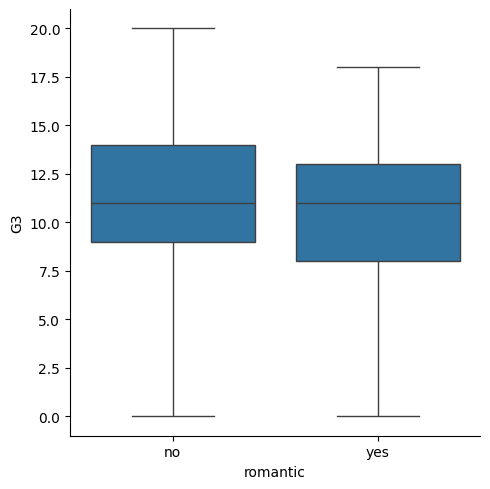

In [17]:
# box plot romantic with final grade
# set whiskers to min and max values
sns.catplot(
    student_data,
    x="romantic",
    y="G3",
    kind="box",
    whis=[0, 100],
)
plt.show()

### Point

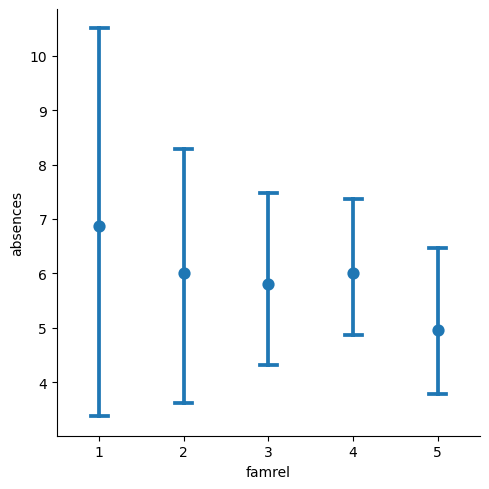

In [18]:
# point plot family relationship with absences
# add caps to show confidence interval
# remove lines joining the points
sns.catplot(
    student_data,
    x="famrel",
    y="absences",
    kind="point",
    capsize=0.2,
    linestyle="none",
)
plt.show()

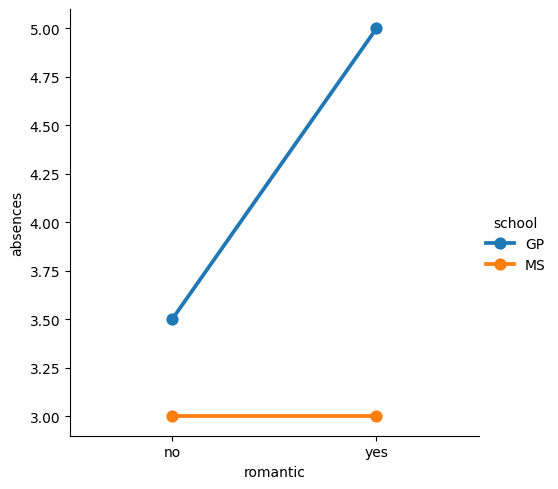

In [19]:
# point plot romantic with absences
# color by school
# remove confidence intervals
# change estimator to median
sns.catplot(
    student_data,
    x="romantic",
    y="absences",
    kind="point",
    hue="school",
    errorbar=None,
    estimator=np.median,
)
plt.show()

## Customizing Plots

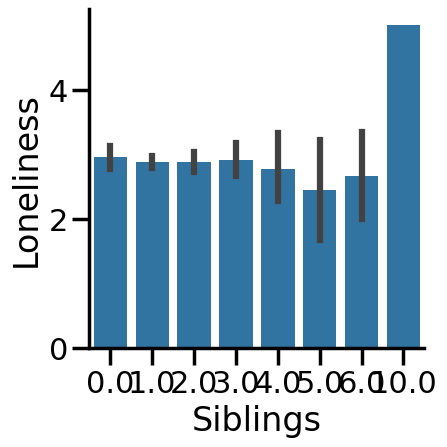

In [20]:
# set context to "poster"
sns.set_context("poster")

# bar plot number of siblings vs loneliness
sns.catplot(
    survey_data,
    x="Siblings",
    y="Loneliness",
    kind="bar",
)
plt.show()

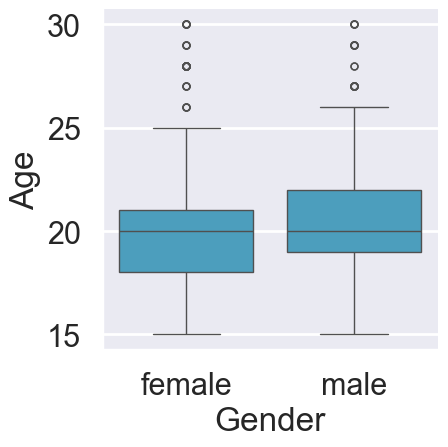

In [21]:
sns.set_style("darkgrid")

# add color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# box plot gender vs age
sns.catplot(
    survey_data,
    x="Gender",
    y="Age",
    kind="box",
)
plt.show()

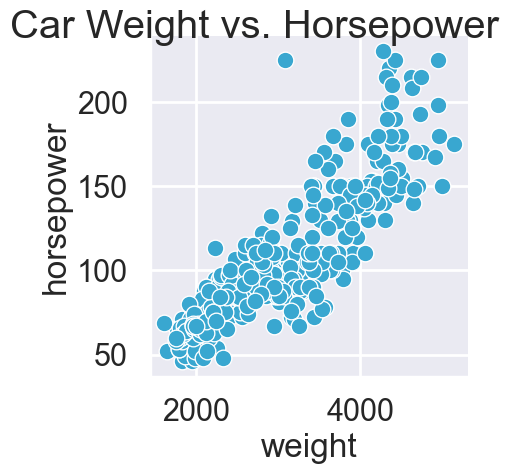

In [22]:
# scatter plot weight vs horsepower
g = sns.relplot(
    mpg,
    x="weight",
    y="horsepower",
    kind="scatter",
)

# add a title
g.fig.suptitle("Car Weight vs. Horsepower")
plt.show()

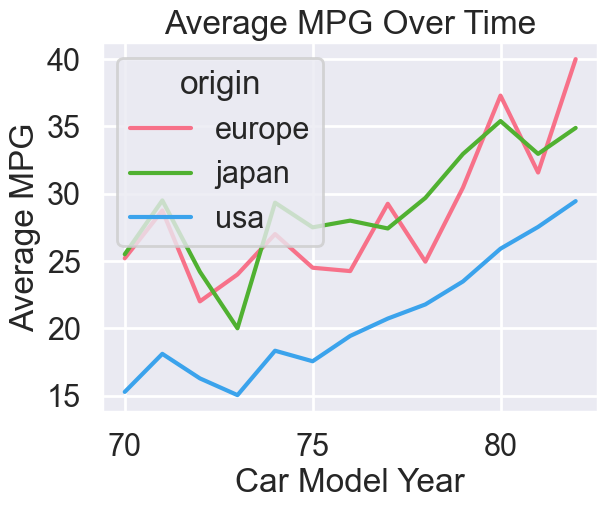

In [23]:
# line plot model year vs average mpg
g = sns.lineplot(
    mpg_mean,
    x="model_year",
    y="mpg_mean",
    hue="origin",
)

# add title
g.set_title("Average MPG Over Time")

# add labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")
plt.show()

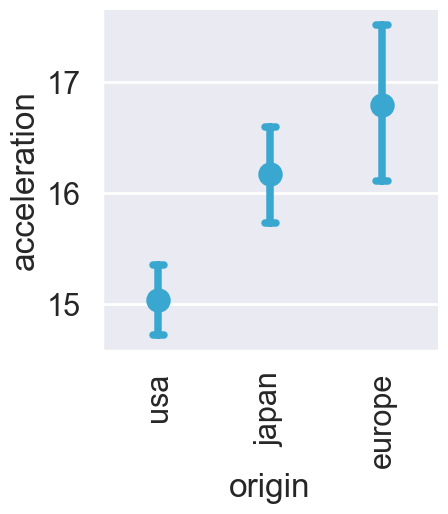

In [24]:
# point plot origin vs acceleration
# set capsize to show bars on ends of confidence interval
# set linestyle to remove line between points
sns.catplot(
    mpg,
    x="origin",
    y="acceleration",
    kind="point",
    capsize=0.1,
    linestyle="none",
)

# rotate x-tick labels
plt.xticks(rotation=90)
plt.show()

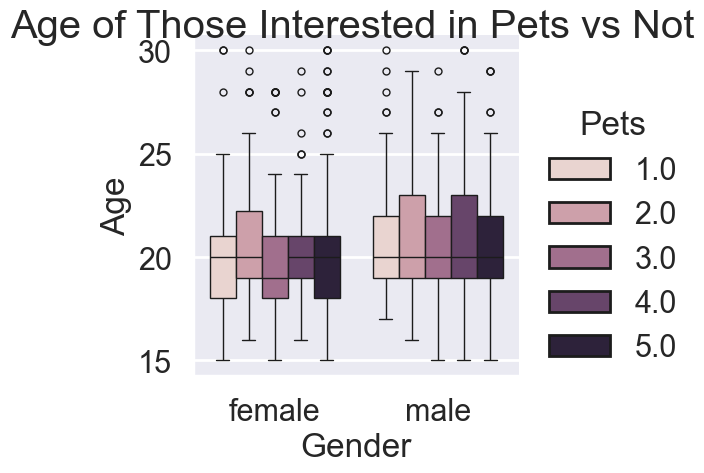

In [25]:
sns.set_palette("Blues")

# box plot gender vs age
# color by pets
g = sns.catplot(
    survey_data,
    x="Gender",
    y="Age",
    kind="box",
    hue="Pets",
)

# add title
g.fig.suptitle("Age of Those Interested in Pets vs Not")
plt.show()

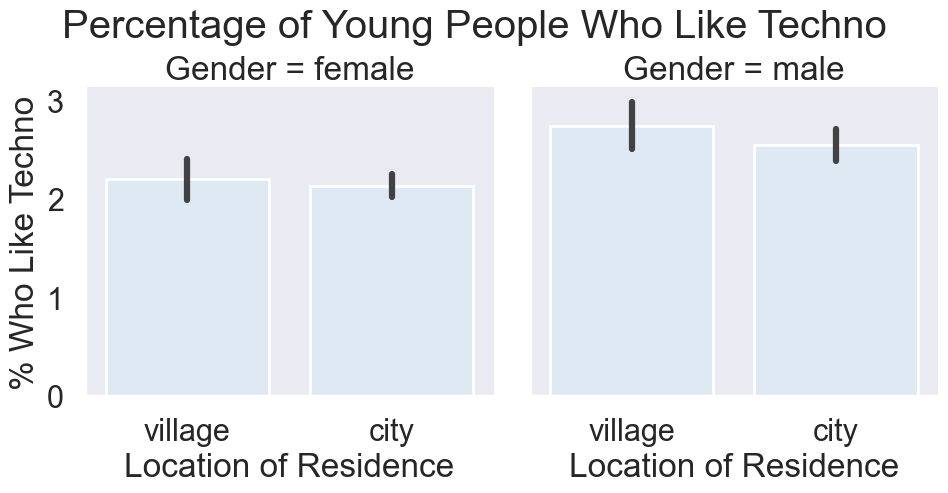

In [26]:
sns.set_style("dark")

# bar plot village vs techo
# subplot by gender
g = sns.catplot(
    survey_data,
    x="Village - town",
    y="Techno",
    kind="bar",
    col="Gender",
)

# add title and labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", ylabel="% Who Like Techno")
plt.show()